# 품질 중요인자 분석(Quality Critical Factors Analysis)

## 문제상황  

A공장에서는 Wine을 생산한다. 좋은 품질의 Wine은 높은 단가로 시장에 판매할 수 있다. A공장에서 생산하는 Wine은 1~9등급까지의 등급이 있고,  
7등급 이상이 가장 프리미엄 Wine이다. 7등급 이상의 Wine을 최대한 많이 생산해야 영업이익을 남길 수 있다. Wine 품질에 영향을 끼치는  
주요 공정변수를 확인하고, 공정 변수 관리를 통해 7등급 이상의 Wine을 생성하고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 7등급 이상 프리미엄 Wine 생산량 부족

2. 기대효과

- 7등급 이상 프리미엄 Wine 생산량 증가, 영업이익 증가  

3. 해결방안

- Wine 품질에 영향을 미치는 인자 도출 및 공정 관리를 통한 프리미엄 Wine 생산

4. 성과측정

- 공정변수 Control 전/후 프리미엄 Wine 생산량 비교

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/품질 중요인자 분석/품질 중요인자 분석_red.csv', sep=';')
df2=pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/품질 중요인자 분석/품질 중요인자 분석_white.csv', sep=';')

df = pd.concat([df1, df2], axis=0)
df.reset_index(drop=True)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 모든 변수에 결측치가 존재하지 않는다.

- 결측치의 개수는 전체 5% 미만이면 보통 제거한다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- 종속변수는 int64형태, 독립변수는 float64형태로 구성되어 있다.

3. 컬럼 설명

- fixed acidity : 산도
- volatile acidity : 휘발선상
- citric acid : 시트르산
- residual sugar : 잔당
- chlorides : 염화물
- free sulfur dioxide : 독립 이산화황
- total sulfur dioxide : 총 이산화항
- density : 밀도
- pH : 수소이온농도
- sulphates : 황산염
- alcohol : 도수
- quality : 품질

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [5]:
outlier = pd.melt(df, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,fixed acidity,7.4
1,fixed acidity,7.8
2,fixed acidity,7.8
3,fixed acidity,11.2
4,fixed acidity,7.4
...,...,...
77959,quality,6.0
77960,quality,5.0
77961,quality,6.0
77962,quality,7.0


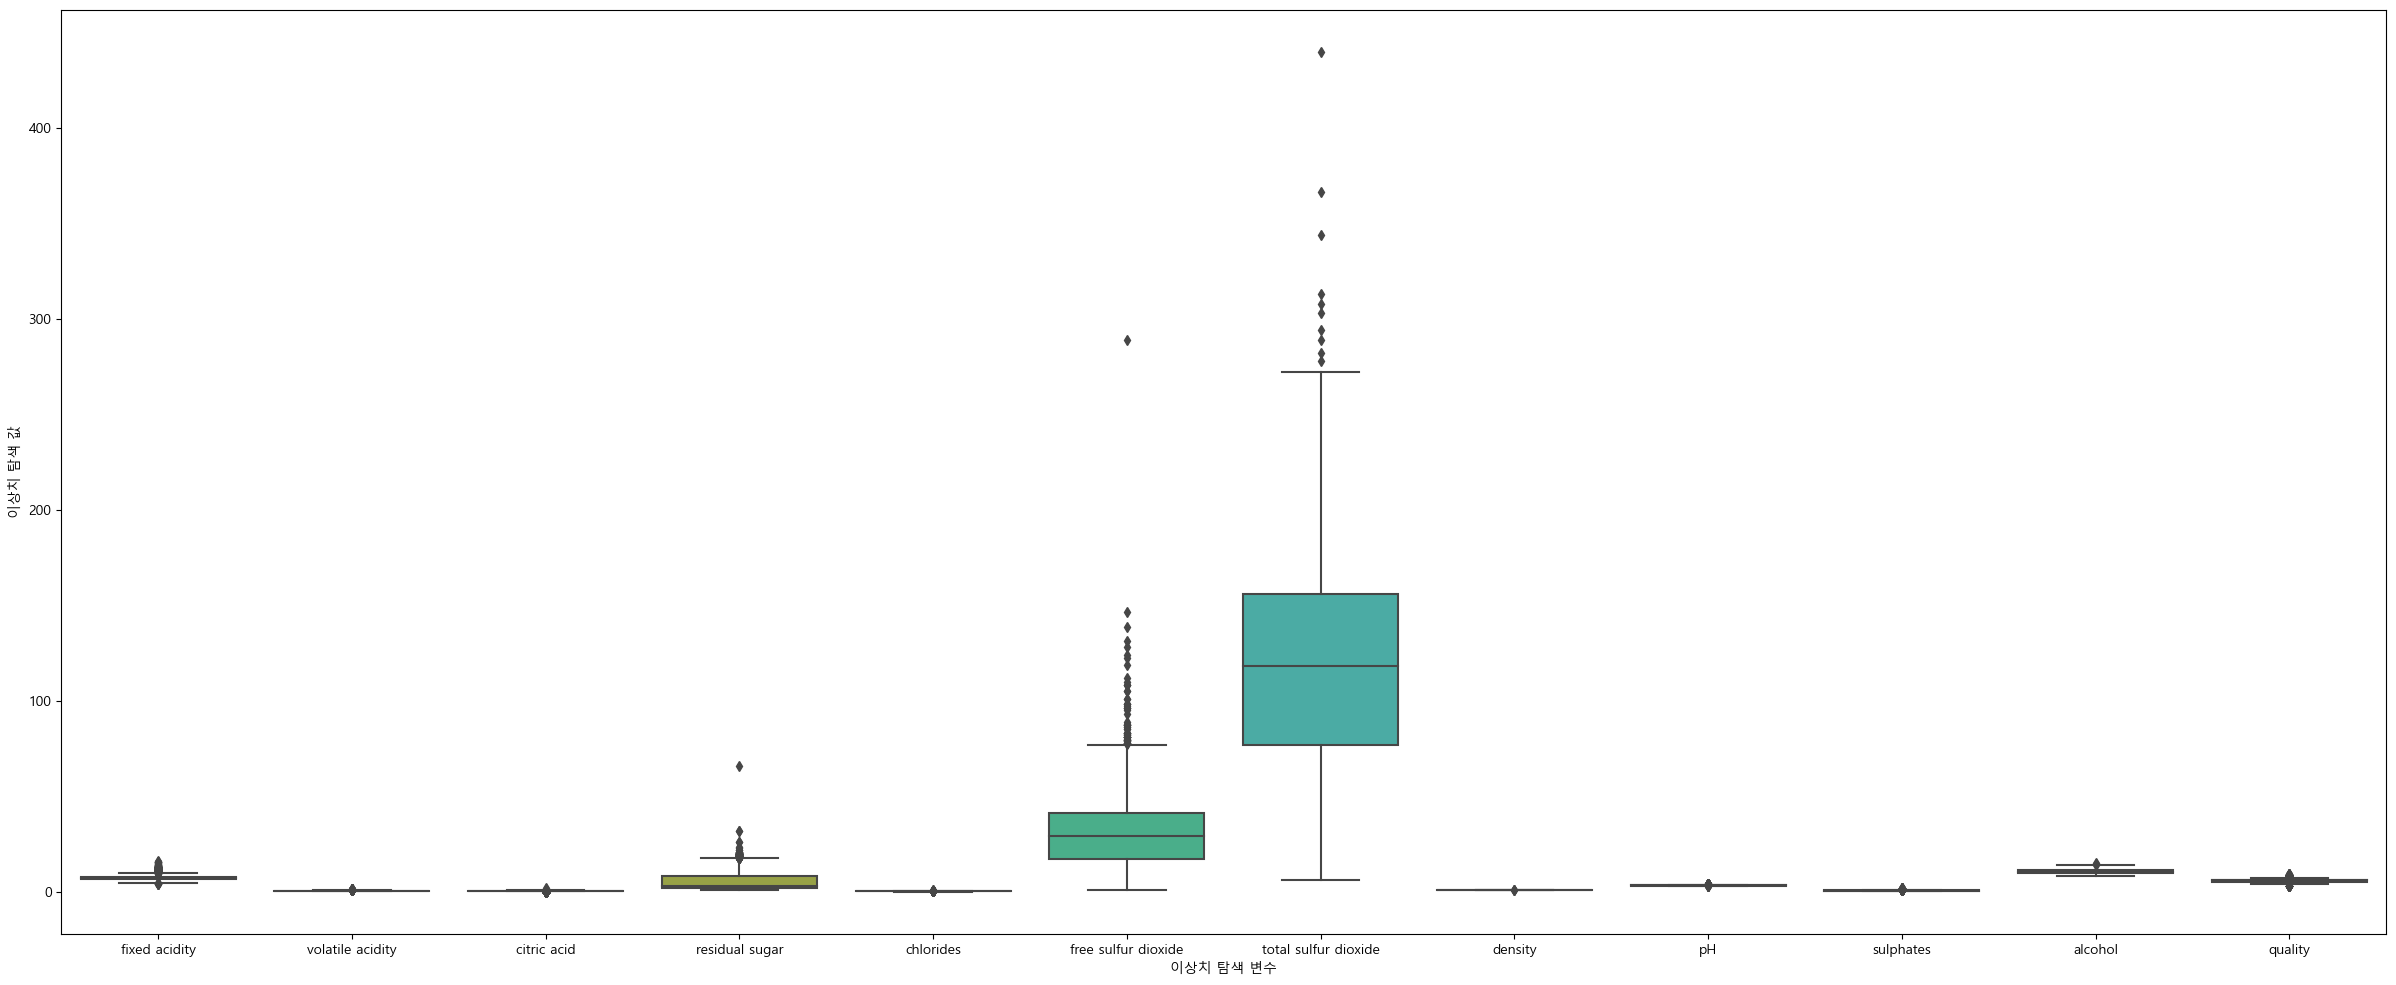

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (30,12))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(12), df.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [9]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

7, 8, 9등급의 Wine이 현저하게 적은 것을 확인할 수 있다

In [10]:
import numpy as np
df['target'] = np.where(df['quality']>6, 1, 0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


7등급 이상의 Wine을 프리미엄 Wine으로 정의하고 target data를 생성한다

In [11]:
df['target'].value_counts()

0    5220
1    1277
Name: target, dtype: int64

프리미엄 Wine을 예측하는 Classification 문제에서 target data를 활용해준다

In [12]:
print("평균 프리미엄 와인 확률 : ", (1277/(1277+5220))*100)

평균 프리미엄 와인 확률 :  19.655225488687087


### 품질 중요인자 탐색

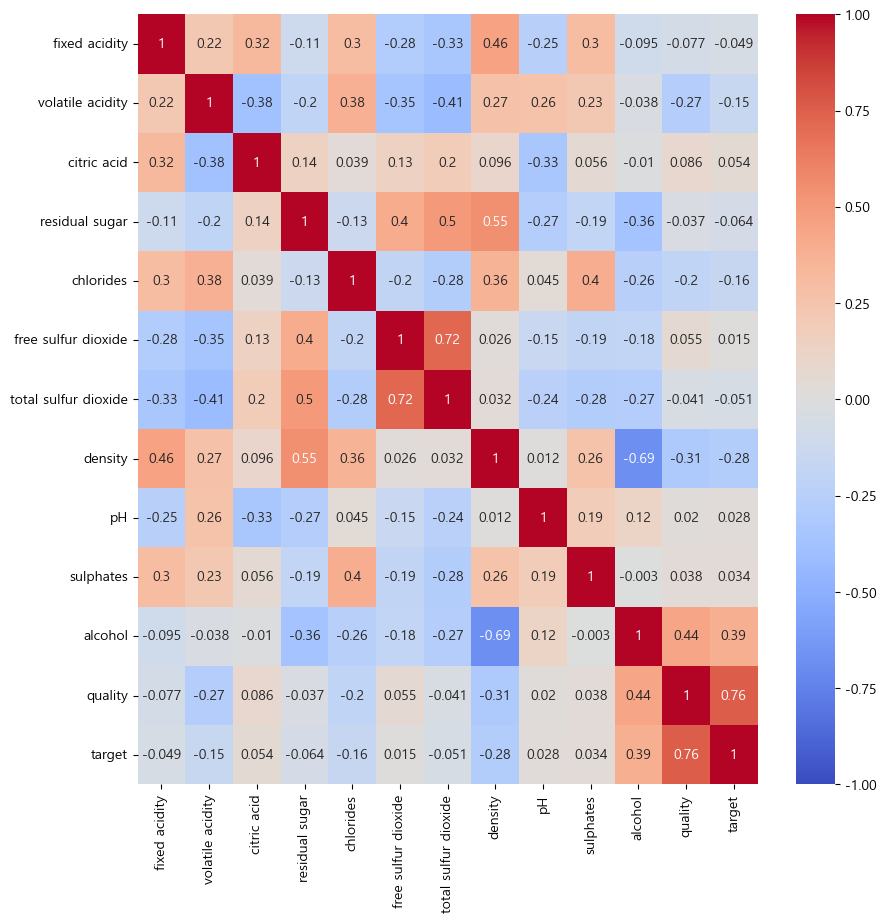

In [13]:
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

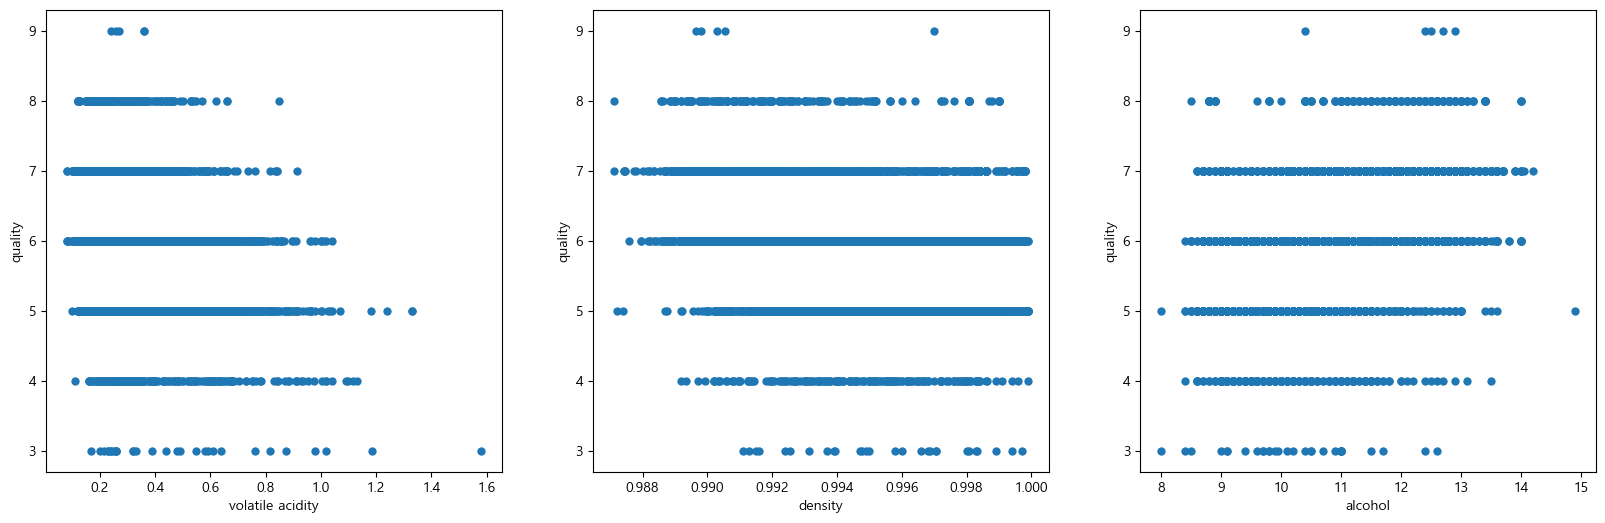

In [14]:
fig, axes = plt.subplots(1, 3)
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[0]);
sns.scatterplot(x=df[df['density']<1]['density'], y=df[df['density']<1]['quality'], linewidth=0, ax=axes[1]);
sns.scatterplot(x=df['alcohol'], y=df['quality'], linewidth=0, ax=axes[2]);
plt.gcf().set_size_inches(20, 6)

상관계수(0.2) 이상의 상관관계를 가지는 변수 집중 탐색한 결과, Wine 등급이 올라갈수록 volatile acidity(휘발선상)이 낮아지는 경향성이 보이는 것을 알 수 있다

## 선형회귀 활용 중요인자 도출 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 11)
(4547,)
(1950, 11)
(1950,)


- 데이터 분리할 때, 분류분석은 stratify를 통해 층화추출하고 회귀분석은 동일한 비율로 나눌수가 없기 때문에 stratify 옵션을 사용하지 않는다

- 보통 데이터 행의 개수와 비슷한 차원이 있는 컬럼은 제거하고 모델링 하는 것이 좋다. 예를 들어, id 같은 것들. 각각의 값이 전부 유니크하면 제거한다

- 새로 만든 파생변수나 기존 컬럼과 동일한 의미의 컬럼들도 제거한다

- 범주형 변수의 값이 3-4개가 적당하고 20개가 넘는 변수는 보통 삭제하고 모델링하는게 좋은데, 처음에는 어떤 변수가 중요한지 모르니 일단 전부 투입시키고 하는게 좋다. 이러한 경우, 범주형 변수들을 인코딩 하면 차원이 워낙 많다보니까 오류 방지 차원에서 train과 test의 값을 합쳐서 만들고 fit 시켜줘야한다

- 분석 시간이 많다 = 범주형 변수들을 하나하나 제거해보면서 모델링

- 분석 시간이 없다 = 효율성을 위해 train과 test의 값을 한번에 fit해서 모델링

선형회귀 실습에서는 사전에 정의한 target data를 사용하지 않고, 기존 quality를 예측한다

In [16]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5642908559103818
r2_score(r2):  0.29863719012785894

mae_test(mae):  0.5821288187016291
r2_score(r2):  0.27350983549417873


단순히 mae를 보고 58점 차이가 난다고 생각할 수 있지만, 그래프를 그려보면 실제로 차이가 많이나는 값들이 있을 수도 있기 때문에 주의가 필요하다

r2의 값이 차이가 적으므로 과적합이 발생했다고 할 수 없다

In [18]:
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,5,5.345379,-0.345379
1,5,5.261835,-0.261835
2,6,6.428616,-0.428616
3,5,5.721059,-0.721059
4,5,5.276663,-0.276663


실제 값과 예측 값에 대해 표현을 diff로 생성해준다

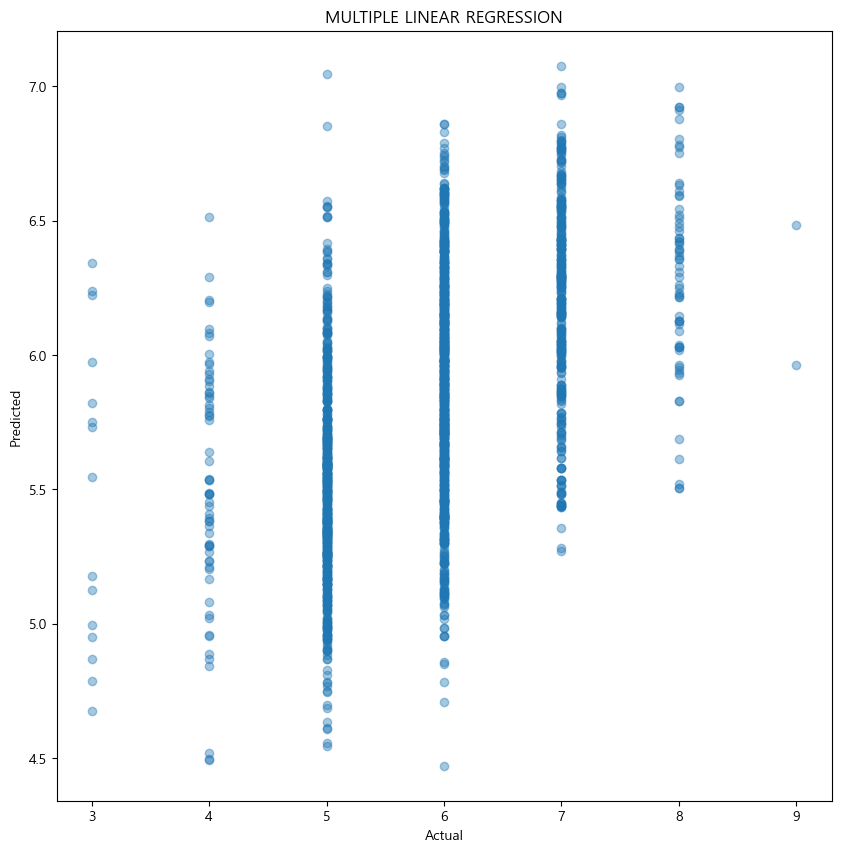

In [19]:
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.gcf().set_size_inches(10, 10)
plt.show()

예측 모델이 얼마나 실제 문제를 잘 설명하는 가를 그래프로 표현해본다. 대각선의 형태가 아닌 값들이 대부분인 것을 알 수 있고, 설명력이 낮음을 의미한다

In [20]:
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(round(df_result['Predicted Values'],0))})
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
931,5,5.0,0.0
370,5,5.0,0.0
4209,6,6.0,0.0
1887,5,6.0,-1.0
1673,5,5.0,0.0


실제 값과 예측 값에 대해 표현을 정수값으로 변환시켜준다

In [22]:
abs(df_result['diff']).mean()

0.5374358974358975

In [23]:
y_pred_test

array([5.34537861, 5.26183457, 6.4286163 , ..., 6.14735488, 5.44310982,
       5.42762391])

In [24]:
np.round(y_pred_test, 0).astype(int)

array([5, 5, 6, ..., 6, 5, 5])

array 형태에 round를 사용할 때는 np.round로 사용해야한다

In [25]:
pred_test = np.round(y_pred_test, 0).astype(int)
mae_test = mean_absolute_error(y_test, pred_test )
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test,np.round(y_pred_test, 0))
print('r2_score(r2): ', r2_test)

mae_test(mae):  0.5374358974358975
r2_score(r2):  0.1385045984780644


정수로 변형된 y 값에 대한 mae,r2 값이 낮은 이유는 소수점자리까지 상세한 분석이 진행되지 않았기 때문이다. 정수형 변환의 이유는 실제값과 예측값의 차이를 직관적으로 보기 위함이다

In [26]:
df_coef = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef

,col,coef
0,fixed acidity,0.038020
1,volatile acidity,-1.300456
2,citric acid,0.016419
3,residual sugar,0.038126
4,chlorides,-0.516810
5,free sulfur dioxide,0.005075
6,total sulfur dioxide,-0.002486
7,density,-46.554602
8,pH,0.283764
9,sulphates,0.728039


회귀식의 장점은 계수(Coefficient)로 어느 정도 설명이 가능하다

In [27]:
df_corr = df.corr()
df_corr = df_corr[(abs(df_corr) > 0.5) & (df_corr != 1)]
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN,NaN,-0.686745,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


상관계수(0.5) 이상의 변수를 집중 탐색해본 결과, 다중공선성을 제거해야함을 확인할 수 있다. 누구에 의해서 결과가 나왔는지 해석하기 어려움이 있고, 분석 결과인 회귀 계수가 불안정해지며 해당 변수의 종속변수에 미치는 영향력을 올바로 설명하지 못하기 때문이다

- (density, residual sugar) → 0.552517	
- (total sulfur dioxide, free sulfur dioxide) → 0.720934  
- (pH, alcohol) → -0.686745

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


'residual sugar', 'total sulfur dioxide', 'pH' 변수를 제거해준다

In [39]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5821646187838316
r2_score(r2):  0.27519899252063507

mae_test(mae):  0.5641174720578989
r2_score(r2):  0.28221052831173543


In [41]:
df_coef_2 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_2

,col,coef
0,fixed acidity,-0.022317
1,volatile acidity,-1.507891
2,citric acid,-0.168614
3,chlorides,-0.252952
4,free sulfur dioxide,0.002567
5,density,36.856660
6,sulphates,0.713433
7,alcohol,0.381334


다중공선성을 제거한 결과, density(밀도)의 회귀계수의 부호가 바뀐 것을 알 수 있다

In [42]:
df_sc = df.copy()

In [52]:
from sklearn.preprocessing import minmax_scale

for i in list(df.columns[0:11]) :
    df_sc[i] = minmax_scale(df_sc[i], axis=0, copy=True)

df_sc.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df_sc.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y=df_sc['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


In [58]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [59]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5768262854028915
r2_score(r2):  0.2793272775325053

mae_test(mae):  0.5753141612502177
r2_score(r2):  0.27542889545313654


In [60]:
df_coef_3 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_3

,col,coef
0,fixed acidity,-0.128895
1,volatile acidity,-2.229121
2,citric acid,-0.258228
3,chlorides,-0.487918
4,free sulfur dioxide,0.971900
5,density,1.486176
6,sulphates,1.213221
7,alcohol,2.522984


scaling을 통해 해석하기 쉬워진 것을 확인할 수 있다

## ML 활용 품질 중요인자 도출

In [63]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'target'], axis=1)
Y = df['target']

x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3)
    
d_train = lgb.Dataset (x_train, label = y_train)

Classification 문제에서 target data를 활용한다. ligthgbm을 사용하기 위해서는 데이터 세트를 적절한 LGB 형식으로 변환시켜줘야한다

In [64]:
params = {} 
params [ 'learning_rate'] = 0.02
params [ 'boosting_type'] = 'gbdt' 
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' 
params [ 'max_depth'] = 3
params [ 'num_leaves' ] = 6
params ['seed'] = 2023
clf = lgb.train (params, d_train, 1000) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 885, number of negative: 3662
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1507
[LightGBM] [Info] Number of data points in the train set: 4547, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194634 -> initscore=-1.420177
[LightGBM] [Info] Start training from score -1.420177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [65]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([0.09959744, 0.14582432, 0.44902179, ..., 0.42843335, 0.03172645,
       0.05820284])

In [66]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.5:       
        y_pred_train[i]=1
    else:  
        y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:      
        y_pred_test[i]=1
    else:  
        y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3662
           1       0.81      0.53      0.64       885

    accuracy                           0.88      4547
   macro avg       0.85      0.75      0.79      4547
weighted avg       0.88      0.88      0.88      4547

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1558
           1       0.69      0.42      0.52       392

    accuracy                           0.85      1950
   macro avg       0.78      0.69      0.72      1950
weighted avg       0.83      0.85      0.83      1950



In [67]:
pd.Series(y_pred_test).value_counts()

0.0    1708
1.0     242
dtype: int64

1. precision  

- 예측한 것 중에 실제로 정답인 비율


2. recall  

- 실제 정답 중에서 예측으로 맞춘 비율

- RandomForestClassifier로 프리미엄 와인을 예측했을 때의 Best Score(recall 0.42)

3. support

- 392개 중에 242개가 실제 정답이고, 242개 중에 42%를 예측에 성공했다

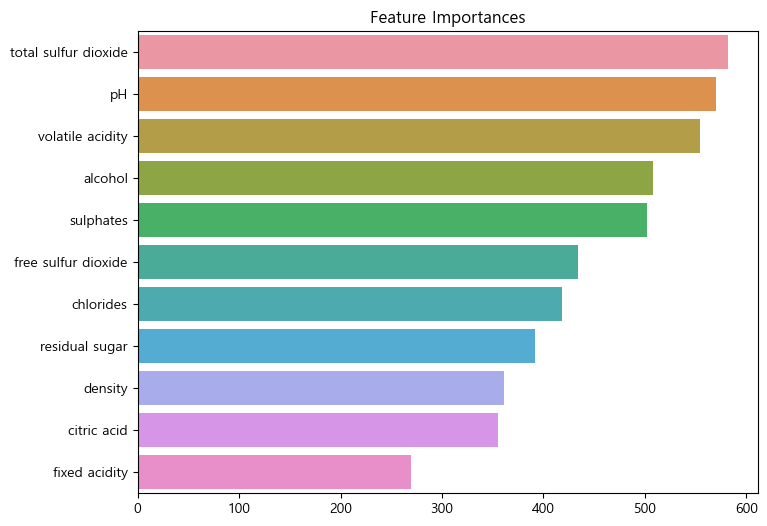

In [68]:
ftr_importances_values = clf.feature_importance()
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, total sulfur dioxide(총 이산화항)가 프리미엄 와인을 예측하는데 가장 중요한 변수임을 확인할 수 있다. 따라서 total sulfur dioxide(총 이산화항)를 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

해당 데이터는 모든 변수가 중요성을 띄고 있으므로 하위 변수들을 제거하고 다시 모델링하는 것은 좋지않다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 공정변수들을 Control하고 전/후 프리미엄 와인 생산량을 비교하는 것이다